In [1]:
import os
import numpy as np
import pandas as pd
import tqdm
import json
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from picconfig import lgbpath, xgbpath, rfpath, predpath, numericpath, outputpath
def form(dir):
    auc={}
    for i in os.listdir(dir):
        if '5w' not in i:
            cat=i.split('_')[1]
            try:
                d = np.load(os.path.join(dir, i), allow_pickle=True)
            except:
                d=[0,0,np.nan]
            if cat not in auc.keys():
                auc[cat]=[d[2]]
            else:
                auc[cat].append(d[2])
    return auc
def form2(dir):
    auc={}
    for i in os.listdir(dir):
        if '5w' not in i:
            cat=i.split('_')[1]
            try:
                d = np.load(os.path.join(dir, i), allow_pickle=True)
            except:
                d=[0,0,np.nan, np.nan]
            if cat not in auc.keys():
                auc[cat]=[d[3]]
            else:
                auc[cat].append(d[3])
    return auc
lgb=form(lgbpath)
print(1)
xgb=form(xgbpath)
print(1)
rf=form(rfpath)
print(1)
raw={}
for i in os.listdir(predpath):
    if i.endswith('.npy'):
        if not i.endswith('lab.npy'):
            if not i.endswith('out.npy'):
                if not i.endswith('trainauc.npy'):
                    raw[i.split('.')[0]]=np.load(predpath+i)
best_perf={}
for i in range(1,7):
    for j in range(4):
        for k in range(1):
            temp=0
            mx=''
            for name in sorted(raw.keys()):
                if name[:3]==f'{i}{j}{k}':
                    if np.nanmean(raw[name])>=temp:
                        mx=name
                        temp=np.nanmean(raw[name])
            best_perf[f'{i}{j}{k}']=mx

1
1
1


In [2]:
cat5data={}
for k,v in best_perf.items():
    if v=='':
        continue
    if k[2]=='0':
        cat5data[k[:2]]=raw[v]
for k in lgb.keys():
    cat5data[str(k)+'4']=np.array(lgb[k])
for k in xgb.keys():
    cat5data[str(k)+'5']=np.array(xgb[k])
for k in rf.keys():
    cat5data[str(k)+'6']=np.array(rf[k])
reordered={}
order=np.array([6,5,4,2,0,3,1],dtype=str)
for i in range(len(order)):
    for j in range(1,7):
        reordered[f'{j}{i}']=cat5data[f'{j}{order[i]}']
cat5data=reordered

In [3]:
for k,v in cat5data.items():
    if len(v)!=1560:
        v+=[np.nan]*(1560-len(v))
    print(k,len(v))

10 1560
20 1560
30 1560
40 1560
50 1560
60 1560
11 1560
21 1560
31 1560
41 1560
51 1560
61 1560
12 1560
22 1560
32 1560
42 1560
52 1560
62 1560
13 1560
23 1560
33 1560
43 1560
53 1560
63 1560
14 1560
24 1560
34 1560
44 1560
54 1560
64 1560
15 1560
25 1560
35 1560
45 1560
55 1560
65 1560
16 1560
26 1560
36 1560
46 1560
56 1560
66 1560


In [4]:
modelnames=['Random Forest','XGBoost','LGBM','Logistic Regression','POPDx','CATI','FCNN',]
def forminput(data,label,length=1568):
    div1=[]
    div2=[]
    length=data[list(data.keys())[0]].shape[0]
    for i in data.keys():
        t,s=i
        div1.append(t)
        div2.append(s)
    div1=np.unique(div1)
    div2=np.unique(div2)
    seqhue=[]
    seqgroup=[]
    seqdata=[]
    for i in div1:
        for j in div2:
            try:
                seqdata+=list(data[i+j])
                seqhue+=[i]*length
                seqgroup+=[j]*length
            except:
                print(i+j)
    return  pd.DataFrame({'group':seqgroup,'hue':seqhue,'data':seqdata, 'label':label})
ipt=forminput(cat5data, label="1")

In [5]:
ipt

,group,hue,data,label
0,0,1,0.422603,1
1,0,1,0.687832,1
2,0,1,0.593496,1
3,0,1,NaN,1
4,0,1,0.523233,1
...,...,...,...,...
65515,6,6,0.619613,1
65516,6,6,0.786676,1
65517,6,6,0.715501,1
65518,6,6,0.699212,1


In [6]:
lgb=form2(lgbpath)
print(1)
xgb=form2(xgbpath)
print(1)
rf=form2(rfpath)
print(1)
raw={}
for i in os.listdir(predpath):
    if i.endswith('.npy'):
        if not i.endswith('lab.npy'):
            if not i.endswith('out.npy'):
                if i.endswith('trainauc.npy'):
                    raw[i.split('.')[0]]=np.load(predpath+i)
best_perf={}
for i in range(1,7):
    for j in range(4):
        for k in range(1):
            temp=0
            mx=''
            for name in sorted(raw.keys()):
                if name[:3]==f'{i}{j}{k}':
                    if np.nanmean(raw[name])>=temp:
                        mx=name
                        print(name)
                        temp=np.nanmean(raw[name])
            best_perf[f'{i}{j}{k}']=mx

1
1
1
100_0trainauc
100_2trainauc
100_3trainauc
100_4trainauc
110_0trainauc
110_10trainauc
110_7trainauc
110_8trainauc
120_0trainauc
120_10trainauc
120_11trainauc
120_12trainauc
120_1trainauc
120_2trainauc
120_3trainauc
120_4trainauc
120_5trainauc
120_6trainauc
120_7trainauc
120_8trainauc
120_9trainauc
130_0trainauc
130_1trainauc
130_2trainauc
130_3trainauc
130_4trainauc
130_6trainauc
200_0trainauc
200_1trainauc
200_2trainauc
200_3trainauc
200_4trainauc
210_0trainauc
210_10trainauc
210_9trainauc
220_0trainauc
220_10trainauc
220_11trainauc
220_12trainauc
220_1trainauc
220_2trainauc
220_3trainauc
220_4trainauc
220_5trainauc
220_6trainauc
220_7trainauc
220_8trainauc
220_9trainauc
230_0trainauc
230_1trainauc
230_2trainauc
230_3trainauc
230_4trainauc
230_6trainauc
300_0trainauc
300_1trainauc
300_2trainauc
300_4trainauc
310_0trainauc
310_10trainauc
310_3trainauc
310_6trainauc
320_0trainauc
320_10trainauc
320_11trainauc
320_12trainauc
320_1trainauc
320_2trainauc
320_3trainauc
320_4trainauc
32

In [7]:
best_perf

{'100': '100_4trainauc',
 '110': '110_8trainauc',
 '120': '120_9trainauc',
 '130': '130_6trainauc',
 '200': '200_4trainauc',
 '210': '210_9trainauc',
 '220': '220_9trainauc',
 '230': '230_6trainauc',
 '300': '300_4trainauc',
 '310': '310_6trainauc',
 '320': '320_9trainauc',
 '330': '330_6trainauc',
 '400': '400_3trainauc',
 '410': '410_6trainauc',
 '420': '420_9trainauc',
 '430': '430_6trainauc',
 '500': '500_6trainauc',
 '510': '510_6trainauc',
 '520': '520_9trainauc',
 '530': '530_6trainauc',
 '600': '600_5trainauc',
 '610': '610_7trainauc',
 '620': '620_9trainauc',
 '630': '630_6trainauc'}

In [8]:
sorted(raw.keys())

['100_0trainauc',
 '100_1trainauc',
 '100_2trainauc',
 '100_3trainauc',
 '100_4trainauc',
 '100_5trainauc',
 '100_6trainauc',
 '110_0trainauc',
 '110_10trainauc',
 '110_11trainauc',
 '110_12trainauc',
 '110_1trainauc',
 '110_2trainauc',
 '110_3trainauc',
 '110_4trainauc',
 '110_5trainauc',
 '110_6trainauc',
 '110_7trainauc',
 '110_8trainauc',
 '110_9trainauc',
 '120_0trainauc',
 '120_10trainauc',
 '120_11trainauc',
 '120_12trainauc',
 '120_1trainauc',
 '120_2trainauc',
 '120_3trainauc',
 '120_4trainauc',
 '120_5trainauc',
 '120_6trainauc',
 '120_7trainauc',
 '120_8trainauc',
 '120_9trainauc',
 '130_0trainauc',
 '130_1trainauc',
 '130_2trainauc',
 '130_3trainauc',
 '130_4trainauc',
 '130_5trainauc',
 '130_6trainauc',
 '200_0trainauc',
 '200_1trainauc',
 '200_2trainauc',
 '200_3trainauc',
 '200_4trainauc',
 '200_5trainauc',
 '200_6trainauc',
 '210_0trainauc',
 '210_10trainauc',
 '210_11trainauc',
 '210_12trainauc',
 '210_1trainauc',
 '210_2trainauc',
 '210_3trainauc',
 '210_4trainauc',
 

In [9]:
cat5data={}
for k,v in best_perf.items():
    if v=='':
        continue
    if k[2]=='0':
        cat5data[k[:2]]=raw[v]
for k in lgb.keys():
    cat5data[str(k)+'4']=np.array(lgb[k])
for k in xgb.keys():
    cat5data[str(k)+'5']=np.array(xgb[k])
for k in rf.keys():
    cat5data[str(k)+'6']=np.array(rf[k])
reordered={}
order=np.array([6,5,4,2,0,3,1],dtype=str)
for i in range(len(order)):
    for j in range(1,7):
        reordered[f'{j}{i}']=cat5data[f'{j}{order[i]}']
cat5data=reordered

In [10]:
ipttrain=forminput(cat5data, label="0")

In [11]:
iptall = pd.concat([ipt, ipttrain], axis=0)

In [12]:
iptall

,group,hue,data,label
0,0,1,0.422603,1
1,0,1,0.687832,1
2,0,1,0.593496,1
3,0,1,NaN,1
4,0,1,0.523233,1
...,...,...,...,...
65515,6,6,0.661108,0
65516,6,6,0.810053,0
65517,6,6,0.741288,0
65518,6,6,0.708360,0


In [13]:
record = []
modelnames=['Random Forest','XGBoost','LGBM','Logistic Regression','POPDx','CATI','FCNN',]
names=['Basic Information','Lifestyle','Measurement','Environment','Genetic', 'Image']
for group in range(7):
    for var in range(6):
        data = iptall[iptall['group']==str(group)]
        subdat = data[data['hue']==str(var+1)]
        train = subdat[subdat['label']=='0']['data'].to_numpy()
        train = train[~np.isnan(train)]
        test = subdat[subdat['label']=='1']['data'].to_numpy()
        test = test[~np.isnan(test)]
        newdata = [modelnames[group], names[var], np.percentile(train, 5), np.percentile(train, 25), np.percentile(train, 50), np.percentile(train, 75), np.percentile(train, 95),
        np.percentile(test, 5), np.percentile(test, 25), np.percentile(test, 50), np.percentile(test, 75), np.percentile(test, 95)]
        record.append(newdata)
records = np.array(record)
records = pd.DataFrame(records, columns=['Method','Data']+['Train 0.05','Train 0.25','Train 0.5','Train 0.75','Train 0.95']+['Test 0.05','Test 0.25','Test 0.5','Test 0.75','Test 0.95'])
records.to_csv(numericpath + "traintestauc.csv", index=None)

In [14]:
subdat = iptall[iptall['group']=='0']
subdat.reset_index(drop=True, inplace=True)

In [15]:
def plotbox(subdat, ax, title):
    colors = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']
    cm = LinearSegmentedColormap.from_list('Nature', colors, N=2)
    colorlist = []
    for i in range(2):
        colorlist.append(cm(i))
    color_palette = sns.color_palette(colorlist)
    # plt.locator_params(axis='y', nbins=11)
    ax.grid(True,linestyle='--',alpha=0.5)
    smedian = subdat.groupby(['hue','label'])['data'].median()
    sns.boxplot(y='data',x='hue',hue='label',hue_order = ['0', '1'], palette=color_palette,data=subdat, whis=2, fliersize=0, notch=False,
                showfliers=True, width = 0.9, boxprops={'linewidth': 1, 'linestyle':"-", 'edgecolor':'white'}, whiskerprops={'linestyle': '-', 'linewidth': 0.5},
                capprops={'linewidth': 0.5}, medianprops={'linewidth': 0.5, 'color':'white'}, gap=0, ax=ax)
    names=['Basic Information','+ Lifestyle','+ Measurement','+ Environment','+ Genetic', '+ Image']
    ax.set_xticks(np.arange(len(names)), names, fontsize=13, rotation=0)
    ax.tick_params(axis='y', labelsize=13)
    legend_names=['Train','Test',]
    legend_handles=[]
    for i in range(2):
        legend_handles.append(Patch(color=colorlist[i], label=legend_names[i]))
    legend = ax.legend(handles=legend_handles, ncol=4,fontsize=15,loc='upper center',bbox_to_anchor=(0.5, 1.14))
    legend.get_frame().set_linewidth(0)
    legend.get_frame().set_facecolor('none') 
    plt.ylim(0.2,1.05)
    plt.xlabel("")
    plt.ylabel("AUC", fontsize=16)
    # title = 'Model Performance Comparison (Prediction Model)'
    plt.title(title, pad=35, fontsize=20)
    # plt.tight_layout()
    for i in range(1,7):
        for j in range(2):
            text = smedian.loc[str(i), str(j)]
            # print(text)
            ax.text(i + 0.44 * j - 1.22, text+0.005, "{:.3f}".format(text), ha="center", fontsize=12)
    # ax.text(0, 0, "Standard")
    #ax.tick_params(axis="x", labelsize=10)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

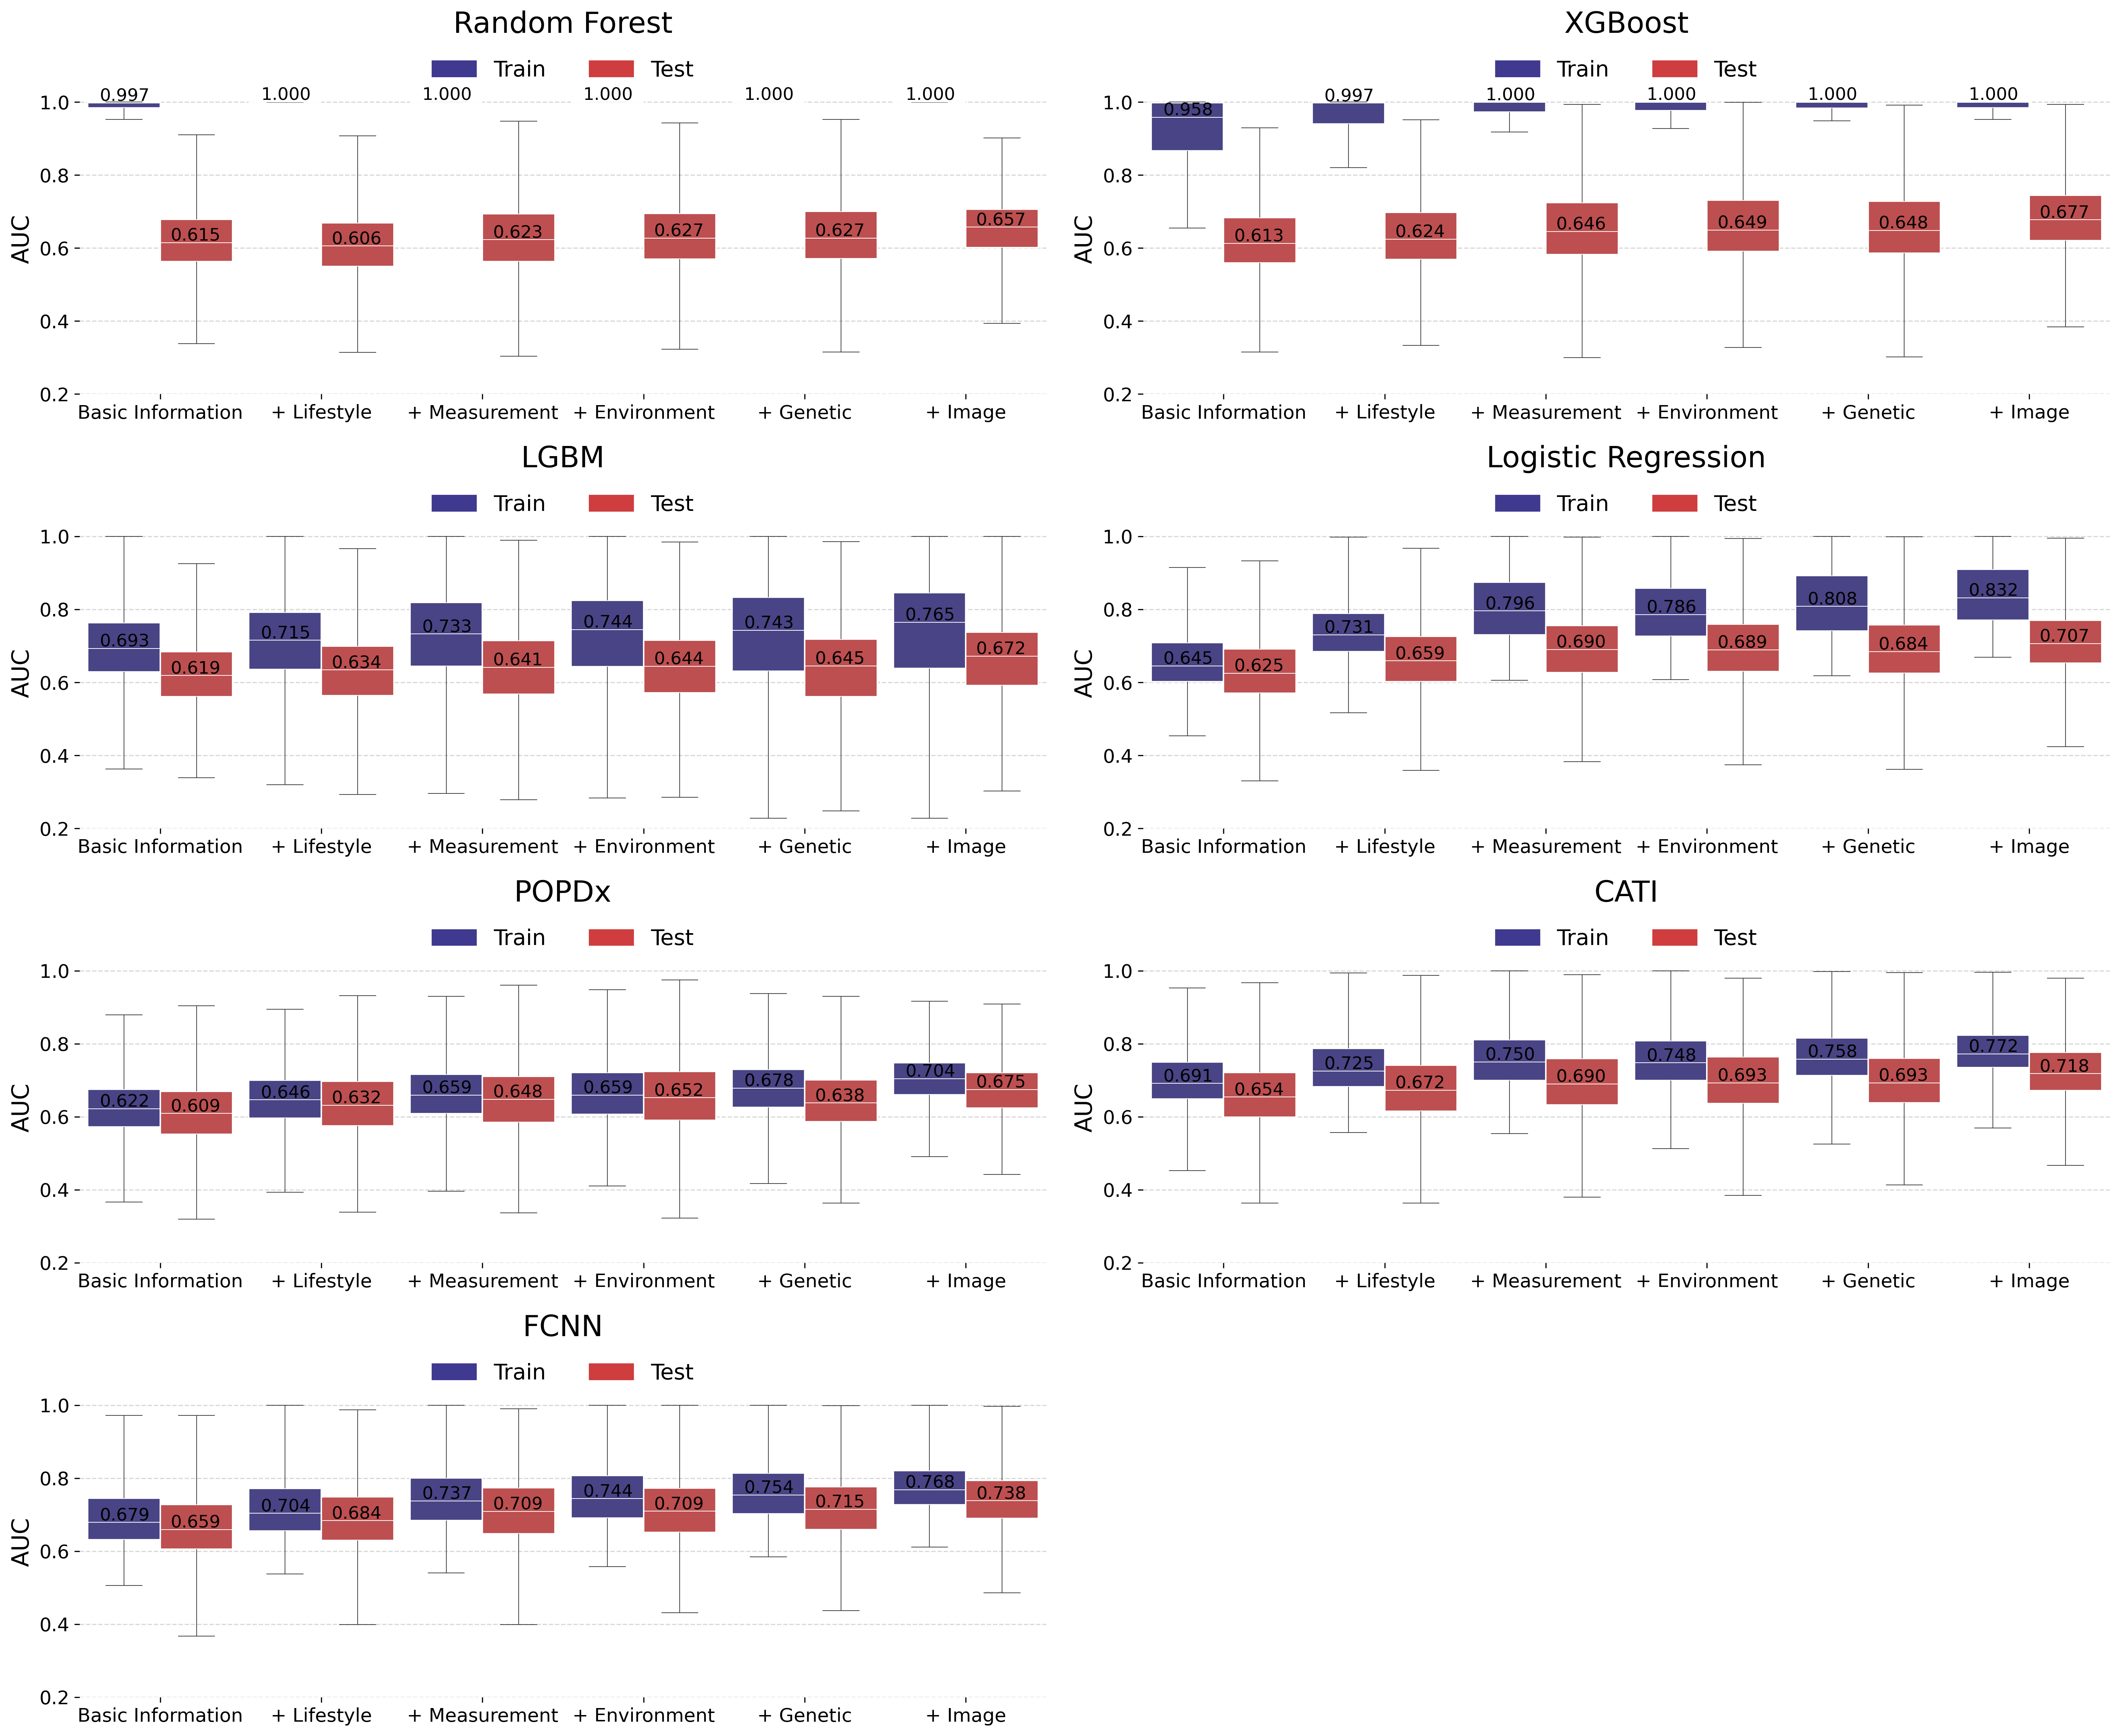

In [16]:
modelnames=['Random Forest','XGBoost','LGBM','Logistic Regression','POPDx','CATI','FCNN',]
fig = plt.figure(figsize=(25,20),dpi=300)
gs0 = gridspec.GridSpec(4, 2, figure=fig, hspace=0.4, wspace=0.1)
ax1 = fig.add_subplot(gs0[0, 0])
subdat = iptall[iptall['group']=='0']
subdat.reset_index(drop=True, inplace=True)
plotbox(subdat, ax1, modelnames[0])
ax2 = fig.add_subplot(gs0[0, 1])
subdat = iptall[iptall['group']=='1']
subdat.reset_index(drop=True, inplace=True)
plotbox(subdat, ax2, modelnames[1])
ax3 = fig.add_subplot(gs0[1, 0])
subdat = iptall[iptall['group']=='2']
subdat.reset_index(drop=True, inplace=True)
plotbox(subdat, ax3, modelnames[2])
ax4 = fig.add_subplot(gs0[1, 1])
subdat = iptall[iptall['group']=='3']
subdat.reset_index(drop=True, inplace=True)
plotbox(subdat, ax4, modelnames[3])
ax5 = fig.add_subplot(gs0[2, 0])
subdat = iptall[iptall['group']=='4']
subdat.reset_index(drop=True, inplace=True)
plotbox(subdat, ax5, modelnames[4])
ax6 = fig.add_subplot(gs0[2, 1])
subdat = iptall[iptall['group']=='5']
subdat.reset_index(drop=True, inplace=True)
plotbox(subdat, ax6, modelnames[5])
ax7 = fig.add_subplot(gs0[3, 0])
subdat = iptall[iptall['group']=='6']
subdat.reset_index(drop=True, inplace=True)
plotbox(subdat, ax7, modelnames[6])
title = "sup_traintestauc"
plt.savefig(outputpath + title+'.pdf', format='pdf',bbox_inches="tight")
plt.show()